# Support Vector Machines

Regina Ceballos Mondragón

147663

In [1]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import matplotlib.path as pth
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import tensorflow as tf

## Data download

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/andSVM_2.csv')
print(df)
X1, X2, y = np.array(df[['X1']]), np.array(df[['X2']]), np.array(df[['y']])

   X1  X2  y
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1
4   2   3  1
5   3   2  1
6   0  -1  0


In [3]:
X = np.concatenate((X1,X2), axis=1)

## Perceptron training

In [4]:
def salida(w, X):
    return X.dot(w[1:]) + w[0]

def entrena(X, y, w, la = 0.0, eta = 1.0):
    for i in range(len(X)):
        error = y[i] - transf(w, X[i])
        w[0] = w[0] + eta * (error)
        w[1:] = w[1:] + eta * (error * X[i]) - la * w[1:]
    return w

def calcError(X, Y, w):
    return np.mean((X.dot(w[1:])+ w[0] - Y)**2)

def transf(w, X):
    if salida(w, X) > 1.5:
        return 1
    else:
        return 0

In [5]:
w = np.asarray([rnd.random() for i in range(1 + len(X[0]))])
for i in range(1000):
    w = entrena(X, y, w)
w

array([-1.02920001,  2.22452647,  0.79196501])

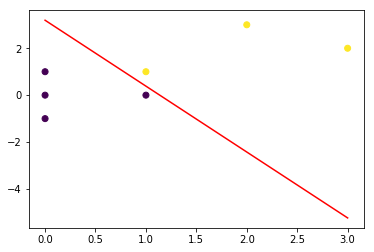

In [6]:
m = (w[0]/w[2])/(-w[0]/w[1])
b = -(w[0]-1.5)/w[2]
x0 = 0.0
y0 = m*x0 +b
x1 = 3.0
y1 = m*x1 +b
plt.scatter(X1, X2, c=y)
plt.plot([x0, x1], [y0, y1], color='red')
plt.show()

We can see that with the perceptron, the data is well divided. Nevertheless, some points are very clore to the boundary line.

## SVM training for different values of C

('C = ', 1)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


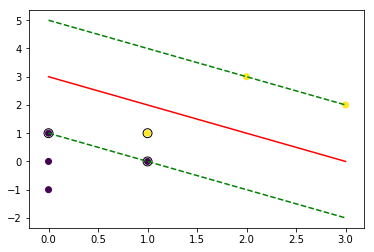

('C = ', 2)


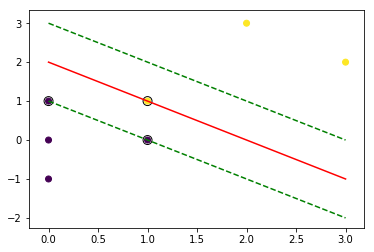

('C = ', 3)


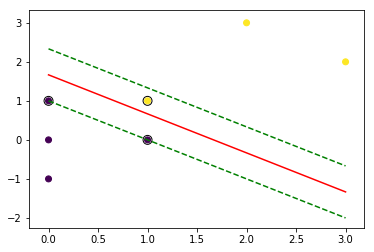

('C = ', 4)


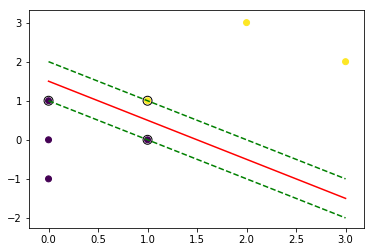

('C = ', 5)


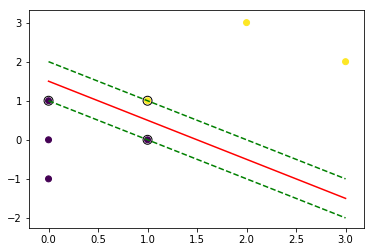

('C = ', 21)


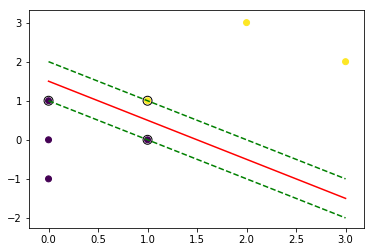

('C = ', 41)


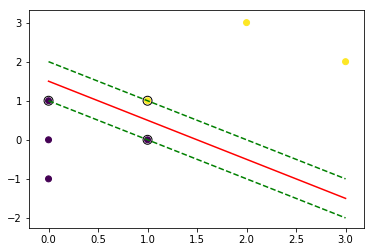

('C = ', 61)


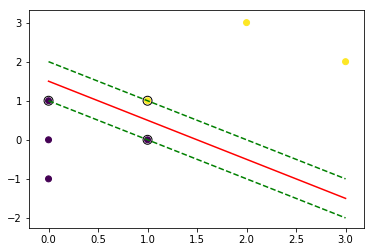

('C = ', 81)


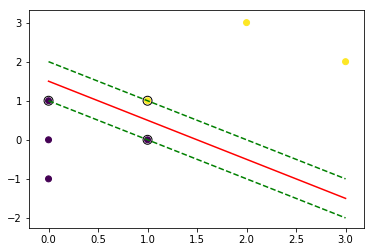

In [7]:
for i in range(1,100):
    if i % 20 == 1 or i <= 5:
        print('C = ',i)
        clf = svm.SVC(kernel='linear', C=i)
        clf.fit(X, y)

        w = np.concatenate((clf.intercept_, clf.coef_[0]))

        m = (w[0]/w[2])/(-w[0]/w[1])
        b = -w[0]/w[2]
        x0 = 0.0
        y0 = m*x0 +b
        x1 = 3.0
        y1 = m*x1 +b
        plt.plot([x0, x1], [y0, y1], 'r-')

        mov = np.sqrt(1 + m ** 2) * (1 / np.sqrt(np.sum(clf.coef_ ** 2)))
        ya0 = y0 - mov
        ya1 = y1 - mov
        yb0 = y0 + mov
        yb1 = y1 + mov
        plt.plot([x0, x1], [ya0, ya1], 'g--')
        plt.plot([x0, x1], [yb0, yb1], 'g--')

        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', edgecolors='k')
        plt.scatter(X1, X2, c=y)

        plt.show()

For the first 3 values of C, the line doesn't separate the data well (one point is on the wrong side of the decision boundary). As C grows, the line divides the data well and we can see that no change happens for another value of C.

## Data for points inside a circle

In [10]:
n = 1000
X1 = np.resize(np.random.uniform(-2, 2, n), (n,1))
X2 = np.resize(np.random.uniform(-2, 2, n), (n,1))

In [11]:
def circ(X1, X2):
    if X1*X1 + X2*X2 < 1:
        return 1.
    else:
        return 0.

In [12]:
X = np.concatenate((X1, X2), axis = 1)
Y = np.resize([circ(X1[i], X2[i]) for i in range(len(X1))], (n,1))

## Neural Network Training

In [8]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])
W1 = tf.Variable(tf.random_uniform([2, 3], -1, 1))
b1 = tf.Variable(tf.zeros([1, 3]))
W2 = tf.Variable(tf.random_uniform([3, 1], -1, 1))
b2 = tf.Variable(tf.zeros([1, 1]))

In [9]:
h = tf.nn.sigmoid(tf.matmul(x, W1) + b1)
yhat = tf.nn.sigmoid(tf.matmul(h, W2) + b2)
ecm = tf.reduce_mean(tf.reduce_sum(tf.square(y - yhat)))
train_step = tf.train.GradientDescentOptimizer(0.03).minimize(ecm)

In [13]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for k in range(10000):
    sess.run(train_step, feed_dict={x: X, y: Y})

In [14]:
xs = np.linspace(-2, 2)
ys = np.linspace(-2, 2)
pred_classes = []
for i in xs:
    for j in ys:
        pred_class = sess.run(yhat, feed_dict={x: [[i, j]]})
        pred_classes.append((i, j, np.around(pred_class)))

## Misclassified points

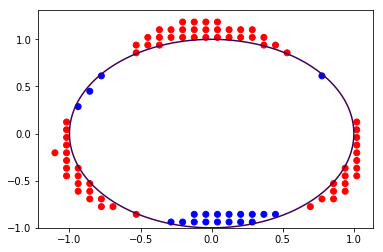

In [15]:
x_predmal = []
y_predmal = []
c_predmal = []
pred = []
true = []
for i, j, c in pred_classes:
    pred.append(c)
    true.append(circ(i, j))
    if circ(i, j) != c:
        x_predmal.append(i)
        y_predmal.append(j)
        c_predmal.append(c)
plt.scatter(x_predmal, y_predmal, c = ['red' if i==1 else 'blue' for i in c_predmal])

xc = np.linspace(-1.0, 1.0, 100)
yc = np.linspace(-1.0, 1.0, 100)
Xc, Yc = np.meshgrid(xc, yc)
F = Xc**2 + Yc**2 - 1
plt.contour(Xc,Yc,F,[0])

plt.show()

In [16]:
confusion_matrix(true, np.resize(pred, (len(pred), 1)))

array([[1964,   68],
       [  20,  448]])

For the neural network, there are a total of 88 misclassified points. The misclassified points are from both classes.

## SVM training

In [17]:
clf = svm.SVC()
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
pred_classes = []
for i in xs:
    for j in ys:
        a = []
        a.append(i)
        a.append(j)
        pred_class = clf.predict([a])
        pred_classes.append((i, j, np.around(pred_class)))

## Misclassified points

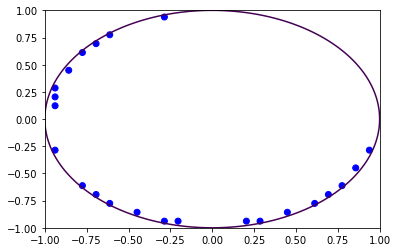

In [19]:
x_predmal = []
y_predmal = []
c_predmal = []
pred = []
true = []
for i, j, c in pred_classes:
    pred.append(c)
    true.append(circ(i, j))
    if circ(i, j) != c:
        x_predmal.append(i)
        y_predmal.append(j)
        c_predmal.append(c)
plt.scatter(x_predmal, y_predmal, c = ['red' if i==1 else 'blue' for i in c_predmal])

xc = np.linspace(-1.0, 1.0, 100)
yc = np.linspace(-1.0, 1.0, 100)
Xc, Yc = np.meshgrid(xc, yc)
F = Xc**2 + Yc**2 - 1
plt.contour(Xc,Yc,F,[0])

plt.show()

In [20]:
confusion_matrix(true, np.resize(pred, (len(pred), 1)))

array([[2032,    0],
       [  23,  445]])

For the SVM, there are only 23 misclassified points and all of them are from the same class. We can see that for this data, the SMV has a better fit.